In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('apartments-wroclaw.csv', delimiter=';')

In [ ]:
print(data)
print(data.columns)

                                                  title  \
0              okazja apartament mieszkanie dwupokojowe   
1     3 pokojowe mieszkanie na sprzedaż/ kredyt #naS...   
2       Słoneczny apartament, miejsce postojowe w cenie   
3      3-pokojowe mieszkanie 66m2 + balkon Bezpośrednio   
4                   2-pokojowe mieszkanie 41m2 + balkon   
...                                                 ...   
9839              3-pokojowe mieszkanie w samym centrum   
9840  Promocja l 2 pokoje na Lipie Piotrowskiej l Ba...   
9841                Klimatyczne mieszkanie w kamienicy.   
9842           Gotowe 3 pokoje z ogródkiem na Zakrzowie   
9843            4-pokojowe mieszkanie 101m2 + 2 balkony   

                                                address      price  rooms  \
0            Gajowice, Fabryczna, Wrocław, dolnośląskie   569000.0      2   
1     ul. Eugeniusza Horbaczewskiego, Gądów, Fabrycz...   750000.0      3   
2     ul. Babiego Lata, Krzyki, Krzyki, Wrocław, dol...   86

In [ ]:
for col in data.columns:
  print(col,
      pd.unique(data[col]))

title ['okazja apartament mieszkanie dwupokojowe'
 '3 pokojowe mieszkanie na sprzedaż/ kredyt #naStart'
 'Słoneczny apartament, miejsce postojowe w cenie' ...
 '3-pokojowe mieszkanie w samym centrum'
 'Klimatyczne mieszkanie w kamienicy.'
 'Gotowe 3 pokoje z ogródkiem na Zakrzowie']
address ['Gajowice, Fabryczna, Wrocław, dolnośląskie'
 'ul. Eugeniusza Horbaczewskiego, Gądów, Fabryczna, Wrocław, dolnośląskie'
 'ul. Babiego Lata, Krzyki, Krzyki, Wrocław, dolnośląskie' ...
 'ul. Racławicka 100, Grabiszynek, Fabryczna, Wrocław, dolnośląskie'
 'Strawińskiego, Jagodno, Krzyki, Wrocław, dolnośląskie'
 'Al. Władysława Sikorskiego, Szczepin, Stare Miasto, Wrocław, dolnośląskie']
price [ 569000.  750000.  865000. ... 1595712.  549670. 1260861.]
rooms [ 2  3  4  5  1  6  8 10 11  7  9]
area [39.19 63.6  50.   ... 88.8  61.16 83.11]
floor ['2' '4' '3' '1' '5' '10' 'parter' '10+' '6' '9' '8' '0' '7' 'suterena'
 nan 'poddasze' '11']
max_floor [ 7. 11.  4.  2. 10.  5.  1.  3.  8.  6. 17.  9. nan 16.

In [ ]:
for col in data.columns:
  print(col,
      data[col].isna().sum())

title 0
address 0
price 781
rooms 0
area 0
floor 139
max_floor 661
rent 5294
energy_certificate 9354
form_of_the_property 1939
finishing_condition 2907
balcony_garden_terrace 2397
parking_place 4228
heating 2797
market 1274
advertisement_type 1274
year_of_construction 2776
type_of_development 2933
windows 4243
is_elevator 1274


In [ ]:
target_feature = 'price'
features = ['rooms', 'area', 'floor', 'max_floor', 'market', 'year_of_construction', 'finishing_condition', 'is_elevator']
features_and_target = features + [target_feature]

In [ ]:
data_cleaned = data[features_and_target]
for feature in features_and_target:
  data_cleaned = data_cleaned[~data_cleaned[feature].isna()]
print(data_cleaned.shape)

(4571, 9)


In [ ]:
data_cleaned = data_cleaned[data_cleaned['floor'] != 'suterena']
data_cleaned = data_cleaned[data_cleaned['floor'] != 'poddasze']
data_cleaned['floor'] = data_cleaned['floor'].replace('parter', '0')
data_cleaned['floor'] = data_cleaned['floor'].replace('10+', '11')
data_cleaned['floor'] = data_cleaned['floor'].astype(int)

In [ ]:
for col in data_cleaned.columns:
  print(col,
      pd.unique(data_cleaned[col]))

rooms [ 2  3  4  5  1  6 10  8  7  9]
area [39.19 63.6  50.   ... 91.35 88.8  63.82]
floor [ 2  4  3  0 11  1  5  6  9  7  8 10]
max_floor [ 7. 11.  4.  5.  3.  6. 10.  2.  8.  9. 18.  1. 23. 48. 16. 17. 14. 12.
 15. 13. 22. 20. 52. 19. 51. 28.]
market ['wtórny' 'pierwotny']
year_of_construction [2.0240e+03 1.9800e+03 2.0150e+03 1.9020e+03 1.9680e+03 2.0080e+03
 2.0190e+03 1.8900e+03 2.0200e+03 2.0220e+03 1.9300e+03 2.0160e+03
 2.0250e+03 1.9600e+03 2.0140e+03 1.9000e+03 2.0010e+03 1.9250e+03
 2.0230e+03 1.9730e+03 2.0120e+03 2.0000e+03 2.0130e+03 1.9040e+03
 2.0020e+03 2.0110e+03 1.9110e+03 2.0170e+03 2.0030e+03 1.9850e+03
 2.0100e+03 1.9630e+03 1.8890e+03 1.9650e+03 2.0050e+03 1.9050e+03
 2.0210e+03 2.0040e+03 1.9710e+03 1.9870e+03 1.9620e+03 1.9750e+03
 2.0060e+03 1.9920e+03 1.9880e+03 1.9200e+03 2.0180e+03 1.9840e+03
 1.9760e+03 1.9570e+03 1.9070e+03 1.9930e+03 1.9500e+03 1.8880e+03
 1.9780e+03 1.9900e+03 1.9060e+03 1.9640e+03 1.9350e+03 1.9910e+03
 1.9810e+03 1.9890e+03 2.0090e+03

In [ ]:
print(data_cleaned.shape)

(4567, 9)


change str to category numbers


In [ ]:
data_cleaned['market'] = data_cleaned['market'].astype('category')
data_cleaned['finishing_condition'] = data_cleaned['finishing_condition'].astype('category')
data_cleaned['is_elevator'] = data_cleaned['is_elevator'].astype('category')

In [ ]:
data_cleaned['market'].cat.categories

Index(['pierwotny', 'wtórny'], dtype='object')

In [ ]:
data_cat = data_cleaned.copy()
data_cat['market'] = data_cat['market'].cat.codes
data_cat['finishing_condition'] = data_cat['finishing_condition'].cat.codes
data_cat['is_elevator'] = data_cat['is_elevator'].cat.codes

In [ ]:
for col in data_cat.columns:
  print(col,
      pd.unique(data_cat[col]))

rooms [ 2  3  4  5  1  6 10  8  7  9]
area [39.19 63.6  50.   ... 91.35 88.8  63.82]
floor [ 2  4  3  0 11  1  5  6  9  7  8 10]
max_floor [ 7. 11.  4.  5.  3.  6. 10.  2.  8.  9. 18.  1. 23. 48. 16. 17. 14. 12.
 15. 13. 22. 20. 52. 19. 51. 28.]
market [1 0]
year_of_construction [2.0240e+03 1.9800e+03 2.0150e+03 1.9020e+03 1.9680e+03 2.0080e+03
 2.0190e+03 1.8900e+03 2.0200e+03 2.0220e+03 1.9300e+03 2.0160e+03
 2.0250e+03 1.9600e+03 2.0140e+03 1.9000e+03 2.0010e+03 1.9250e+03
 2.0230e+03 1.9730e+03 2.0120e+03 2.0000e+03 2.0130e+03 1.9040e+03
 2.0020e+03 2.0110e+03 1.9110e+03 2.0170e+03 2.0030e+03 1.9850e+03
 2.0100e+03 1.9630e+03 1.8890e+03 1.9650e+03 2.0050e+03 1.9050e+03
 2.0210e+03 2.0040e+03 1.9710e+03 1.9870e+03 1.9620e+03 1.9750e+03
 2.0060e+03 1.9920e+03 1.9880e+03 1.9200e+03 2.0180e+03 1.9840e+03
 1.9760e+03 1.9570e+03 1.9070e+03 1.9930e+03 1.9500e+03 1.8880e+03
 1.9780e+03 1.9900e+03 1.9060e+03 1.9640e+03 1.9350e+03 1.9910e+03
 1.9810e+03 1.9890e+03 2.0090e+03 1.9950e+03 1.970

one hot encoding

In [ ]:
def price_hist(threshold=np.inf):
  # Generate random data
  data = data_cat['price'].to_numpy()
  data = data[data<threshold]
  # Create the histogram
  plt.hist(data, bins=30, edgecolor='black')

  # Add titles and labels
  plt.title('Histogram of Random Data')
  plt.xlabel('Value')
  plt.ylabel('Frequency')

  # Show the plot
  plt.show()


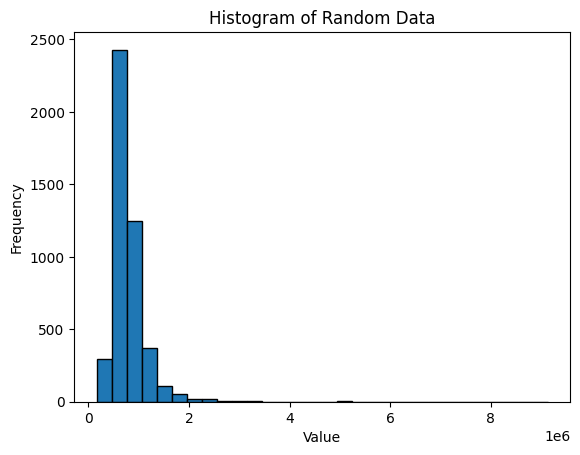

In [ ]:
price_hist()

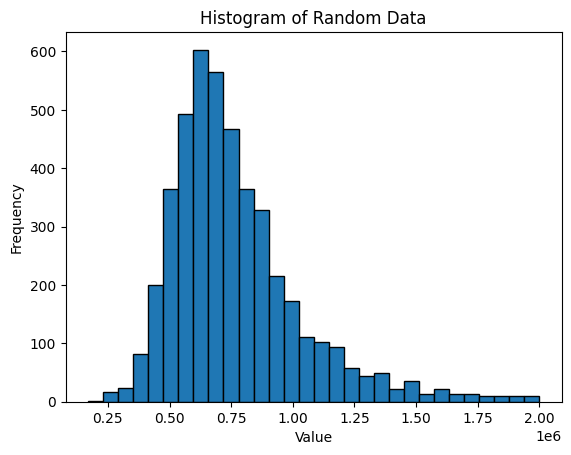

In [ ]:
price_hist(2000000)

zrob wykres gdzie sa 3 histogramy przezroczyste nalozone na siebie, kazdy pokazuje rozklad ceny dla probek z kazdego typu wykonczenia

In [ ]:
data_cat = data_cat[data_cat['price'] < 2000000]

In [ ]:
print(data_cat.shape)

(4510, 9)


In [ ]:
data_one_hot = pd.get_dummies(data_cat, columns=['finishing_condition'])
print(data_one_hot)

      rooms   area  floor  max_floor  market  year_of_construction  \
0         2  39.19      2        7.0       1                2024.0   
1         3  63.60      4       11.0       1                1980.0   
2         2  50.00      3        4.0       1                2015.0   
9         2  46.00      0        5.0       1                1902.0   
10        3  46.03     11       11.0       1                1968.0   
...     ...    ...    ...        ...     ...                   ...   
9837      3  71.90      0        1.0       0                2023.0   
9839      3  70.60      3        6.0       0                2024.0   
9840      2  42.20      0        2.0       0                2025.0   
9841      2  60.00      1        4.0       1                1910.0   
9842      3  63.82      0        4.0       0                2023.0   

      is_elevator      price  finishing_condition_0  finishing_condition_1  \
0               1   569000.0                  False                   True   
1  

In [ ]:
X = data_one_hot.drop(columns=[target_feature]).to_numpy().astype(np.float32)
y = data_one_hot[target_feature].to_numpy().astype(np.float32)
print(X[:10], y[:10], X.shape, y.shape)

[[2.000e+00 3.919e+01 2.000e+00 7.000e+00 1.000e+00 2.024e+03 1.000e+00
  0.000e+00 1.000e+00 0.000e+00]
 [3.000e+00 6.360e+01 4.000e+00 1.100e+01 1.000e+00 1.980e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 5.000e+01 3.000e+00 4.000e+00 1.000e+00 2.015e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.600e+01 0.000e+00 5.000e+00 1.000e+00 1.902e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 4.603e+01 1.100e+01 1.100e+01 1.000e+00 1.968e+03 1.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [4.000e+00 6.630e+01 1.000e+00 4.000e+00 1.000e+00 2.024e+03 1.000e+00
  0.000e+00 1.000e+00 0.000e+00]
 [5.000e+00 7.613e+01 3.000e+00 3.000e+00 1.000e+00 2.008e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.920e+01 1.000e+00 4.000e+00 1.000e+00 2.019e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.800e+01 1.000e+00 4.000e+00 1.000e+00 1.890e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.985e+01 1.000e+00 6.000e+00 0.000e+00 2.0

podzial na zbiory

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train = np.random.rand(100, 3)
y_train = np.random.randint(0, 2, 100)
print(X_train, y_train)

[[0.03611931 0.76302768 0.57743975]
 [0.49823315 0.61527986 0.41571536]
 [0.9220969  0.97871813 0.55427733]
 [0.92596141 0.22520607 0.16383601]
 [0.1449139  0.60369404 0.10159487]
 [0.06696207 0.77210773 0.8568953 ]
 [0.14377922 0.81460164 0.19813305]
 [0.71185374 0.74763011 0.74704418]
 [0.88493128 0.9190296  0.73751998]
 [0.71710327 0.62070196 0.00554705]
 [0.95820464 0.61197467 0.32410738]
 [0.6283727  0.9280093  0.42089069]
 [0.97416555 0.34203897 0.18063245]
 [0.67123342 0.08932371 0.00623485]
 [0.34661319 0.33148494 0.15181489]
 [0.49940452 0.51965021 0.68137689]
 [0.92669578 0.81889667 0.71940738]
 [0.72554715 0.84887448 0.3932911 ]
 [0.30235886 0.93685222 0.21694188]
 [0.90025207 0.21204325 0.52382381]
 [0.9049375  0.11697445 0.87953238]
 [0.55059803 0.83565576 0.58664072]
 [0.1407621  0.46207447 0.92751666]
 [0.79219144 0.90464906 0.43735736]
 [0.5069492  0.45824481 0.28840854]
 [0.44336081 0.989895   0.9951135 ]
 [0.34308429 0.18174806 0.38896863]
 [0.12737381 0.92017744 0.09

In [ ]:
X_test = np.random.rand(20, 3)
y_test = np.random.randint(0, 2, 20)
print(X_test, y_test)

[[0.55453334 0.82703656 0.89998604]
 [0.06375849 0.37839881 0.59598344]
 [0.11060131 0.79089013 0.53555646]
 [0.97009522 0.79610121 0.24977559]
 [0.89921901 0.70432735 0.04551811]
 [0.2992673  0.09522398 0.69393421]
 [0.92670544 0.99526258 0.15123805]
 [0.87420222 0.51908875 0.03445325]
 [0.43197027 0.01338577 0.02434465]
 [0.47468316 0.57034396 0.69881358]
 [0.3458887  0.92756464 0.0324104 ]
 [0.36411579 0.56665511 0.95888522]
 [0.34597645 0.60985532 0.26754748]
 [0.80290872 0.32151725 0.77843758]
 [0.52049185 0.87162815 0.68372201]
 [0.30735392 0.28512612 0.27681448]
 [0.64300353 0.99143118 0.94416016]
 [0.26214645 0.89349457 0.28816451]
 [0.59349334 0.75239098 0.2090326 ]
 [0.0890077  0.67912056 0.84135912]] [0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0]


In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
results = []
for c in param_grid['C']:
  for gamma in param_grid['gamma']:
    svc = SVC(C=c, gamma=gamma)
    svc.fit(X_train, y_train)
    results.append((svc.score(X_test, y_test))
    print(c, gamma)

0.001 0.001
0.001 0.01
0.001 0.1
0.001 1
0.001 10
0.001 100
0.01 0.001
0.01 0.01
0.01 0.1
0.01 1
0.01 10
0.01 100
0.1 0.001
0.1 0.01
0.1 0.1
0.1 1
0.1 10
0.1 100
1 0.001
1 0.01
1 0.1
1 1
1 10
1 100
10 0.001
10 0.01
10 0.1
10 1
10 10
10 100
100 0.001
100 0.01
100 0.1
100 1
100 10
100 100


In [ ]:
svc = sorted(results, key=lambda x: x[0])[-1][1]

In [ ]:
svc.score(X_test, y_test)

0.55

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=420)

In [289]:
print(X_train.shape, X_val.shape, X_test.shape)

(3044, 10) (1015, 10) (451, 10)


srednia 0 + odchylenie std 1


In [290]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X_val = X_scaler.transform(X_val)

y_scaler = StandardScaler()
y_scaler.fit(y_train.reshape(-1, 1))

y_train = y_scaler.transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()
y_val = y_scaler.transform(y_val.reshape(-1, 1)).flatten()

In [291]:
print(y_train)

[-0.8226967  -0.5136102  -0.3274135  ...  0.75625134  0.04013881
  0.1194586 ]


In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

print(mean_squared_error(model_lin.predict(X_train), y_train),
      mean_squared_error(model_lin.predict(X_val), y_val))

0.41979876 0.3605412


In [293]:
for i in range(10):
  print( y_scaler.inverse_transform(y_val[i].reshape(-1, 1)).flatten(), y_scaler.inverse_transform(model_lin.predict(X_val[i].reshape(1, -1))[0].reshape(-1, 1)).flatten())

[646000.] [690483.2]
[1018541.] [962713.56]
[1379000.] [937863.7]
[670000.] [804900.44]
[589000.] [638070.]
[580000.] [537515.44]
[587094.] [722234.7]
[775000.] [829184.6]
[1050000.] [785879.94]
[392058.] [459471.97]


In [294]:
X_train_t = torch.tensor(X_train)
X_test_t = torch.tensor(X_test)
X_val_t = torch.tensor(X_val)

y_train_t = torch.tensor(y_train)
y_test_t = torch.tensor(y_test)
y_val_t = torch.tensor(y_val)

In [306]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.net = torch.nn.Sequential(
        torch.nn.Linear(10, 128),
        torch.nn.ReLU(),
        torch.nn.Dropout(.3),
        torch.nn.Linear(128, 1),
      # torch.nn.Linear(10, 1)
    )

  def forward(self, x):
    # x.shape = (n_samples, m_features)
    return self.net(x)

In [299]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)

batch_size = 16 # po ile probek na raz  ktorycg bedzeie srednia zamin beedizemy uczyc
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # iterator do robienia batchy
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True) # iterator do robienia batchy

In [307]:
net = Net()
lr = 0.001
n_epochs = 100 # ile razy 1 datraset vbedfzeimy mielic przez siec

optim = torch.optim.Adam(net.parameters(), lr=lr) # taki leopszy algorym go liczenia gradientu
loss = torch.nn.MSELoss()

for i in range(n_epochs):
  loss_sum = 0
  for inputs, targets in train_dataloader:

    outputs = net(inputs)
    l = loss(outputs.flatten(), targets)
    l.backward()
    with torch.no_grad():
      loss_sum += l*inputs.shape[0]
      # loss_sum += mean_squared_error(model_lin.predict(inputs), targets)
      optim.step()
      optim.zero_grad()

  with torch.no_grad():
    print(i, (loss_sum/X_train_t.shape[0]).item(), loss(net(X_val_t).flatten(), y_val_t).item())

0 0.6057227253913879 0.4337868392467499
1 0.46189889311790466 0.38057103753089905
2 0.42500314116477966 0.36757412552833557
3 0.42976927757263184 0.34364601969718933
4 0.4202735722064972 0.35514500737190247
5 0.39448586106300354 0.33838140964508057
6 0.3786397874355316 0.33740633726119995
7 0.38969025015830994 0.3332439064979553
8 0.36310333013534546 0.33450156450271606
9 0.3852970600128174 0.3376676142215729
10 0.3646085560321808 0.3231315612792969
11 0.3773272633552551 0.33678576350212097
12 0.38589048385620117 0.33837413787841797
13 0.3590697944164276 0.33884838223457336
14 0.3460058867931366 0.33822759985923767
15 0.3503689765930176 0.32875120639801025
16 0.3582072854042053 0.31407371163368225
17 0.37544775009155273 0.3158250153064728
18 0.3615017235279083 0.3302956521511078
19 0.3564656376838684 0.3298330307006836
20 0.3523385226726532 0.31721043586730957
21 0.35598236322402954 0.3273903727531433
22 0.33990153670310974 0.3238590359687805
23 0.3471604585647583 0.30704134702682495
2

In [320]:
net.eval()
print(loss(net(X_val_t).flatten(), y_val_t).item())

preds_unscaled = y_scaler.inverse_transform(net(X_val_t).detach().numpy()).flatten()

targets_unscaled = y_scaler.inverse_transform(y_val_t.reshape(-1, 1)).flatten()
print(mean_squared_error(preds_unscaled, targets_unscaled))

0.28176000714302063
20317738223.943


In [317]:
print(preds_unscaled, tarets_unscaled)

[ 705606.44  919006.1  1074306.4  ...  920968.4   755048.9   331356.34] [ 645999.99680475 1018541.00438672 1379000.04526834 ...  795987.00080573
  669999.99852257  289999.98732959]


In [327]:
print(np.mean(np.abs(preds_unscaled- targets_unscaled)))
print(np.mean(np.abs( y_scaler.inverse_transform(model_lin.predict(X_val_t).reshape(-1, 1)).flatten() - targets_unscaled)))

98894.20359307594
110077.48025370696
